In [1]:
#Projet Meteo 
#Bac à sable Samuel

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")
sns.set_theme()
from sklearn.preprocessing import StandardScaler

In [2]:
conda install -c conda-forge imbalanced-learn

Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


# Finalisation du dataset 

In [2]:
df4=pd.read_csv('./df5.csv',index_col='Id')

df=df4.dropna(axis = 0, how = 'any') 
df.columns = df.columns.str.lower()

# Classement des villes en fonction de leur location climatique (attention, dictionnaire à consolider, notamment différencier les villes "Plaine" vs "Tempéré")
climates = { 'Albury': 'Temperate',
             'Adelaide': 'Temperate',
             'Albany': 'Temperate',
             'AliceSprings': 'Desert',
             'BadgerysCreek': 'Temperate',
             'Ballarat': 'Temperate',
             'Bendigo': 'Temperate',
             'Brisbane': 'Subtropical',
             'Cairns': 'Tropical',
             'Canberra': 'Temperate',
             'Cobar': 'Subtropical',
             'CoffsHarbour': 'Subtropical',
             'Dartmoor': 'Temperate',
             'Darwin': 'Tropical',
             'GoldCoast': 'Subtropical',
             'Hobart': 'Temperate',
             'Katherine': 'Tropical',
             'Launceston': 'Temperate',
             'Melbourne': 'Temperate',
             'MelbourneAirport': 'Temperate',
             'Mildura': 'Temperate',
             'Moree': 'Subtropical',
             'MountGambier': 'Temperate',
             'MountGinini': 'Temperate',
             'Newcastle': 'Temperate',
             'Nhil': 'Temperate',
             'NorahHead': 'Temperate',
             'NorfolkIsland': 'Subtropical',
             'Nuriootpa': 'Temperate',
             'PearceRAAF': 'Temperate',
             'Penrith': 'Temperate',
             'Perth': 'Temperate',
             'PerthAirport': 'Temperate',
             'Portland': 'Temperate',
             'Richmond': 'Temperate',
             'Sale': 'Temperate',
             'SalmonGums': 'Temperate',
             'Sydney': 'Temperate',
             'SydneyAirport': 'Temperate',
             'Townsville': 'Tropical',
             'Tuggeranong': 'Temperate',
             'Uluru': 'Desert',
             'WaggaWagga': 'Temperate',
             'Walpole': 'Temperate',
             'Watsonia': 'Temperate',
             'Williamtown': 'Temperate',
             'Witchcliffe': 'Temperate',
             'Wollongong': 'Temperate',
             'Woomera': 'Desert'}

df['climate'] = df['location'].map(climates)

# caractéristiques géographiques (attention, il y a des coquilles, dictionnaire à consolider)
geography = {
    'Albury': 'coastal',
    'BadgerysCreek': 'coastal',
    'Cobar': 'mountainous',
    'CoffsHarbour': 'coastal',
    'Moree': 'mountainous',
    'Newcastle': 'mountainous',
    'NorahHead': 'coastal',
    'NorfolkIsland': 'island',
    'Penrith': 'coastal',
    'Richmond': 'coastal',
    'Sydney': 'coastal',
    'SydneyAirport': 'coastal',
    'WaggaWagga': 'valley',
    'Williamtown': 'mountainous',
    'Wollongong': 'coastal',
    'Canberra': 'mountainous',
    'Tuggeranong': 'mountainous',
    'MountGinini': 'mountainous',
    'Ballarat': 'mountainous',
    'Bendigo': 'mountainous',
    'Sale': 'mountainous',
    'MelbourneAirport': 'mountainous',
    'Melbourne': 'mountainous',
    'Mildura': 'mountainous',
    'Nhil': 'mountainous',
    'Portland': 'mountainous',
    'Watsonia': 'mountainous',
    'Dartmoor': 'mountainous',
    'Brisbane': 'mountainous',
    'Cairns': 'mountainous',
    'GoldCoast': 'mountainous',
    'Townsville': 'coastal',
    'Adelaide': 'coastal',
    'MountGambier': 'mountainous',
    'Nuriootpa': 'mountainous',
    'Woomera': 'mountainous',
    'Albany': 'coastal',
    'Witchcliffe': 'coastal',
    'PearceRAAF': 'coastal',
    'PerthAirport': 'coastal',
    'Perth': 'coastal',
    'SalmonGums': 'valley',
    'Walpole': 'mountainous',
    'Hobart': 'coastal',
    'Launceston': 'mountainous',
    'AliceSprings': 'desert',
    'Darwin': 'desert',
    'Katherine': 'desert',
    'Uluru': 'desert'
}

df['geography'] = df['location'].map(geography)


df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['year'] = df['date'].dt.year.astype('int16')
df['month'] = df['date'].dt.month.astype('int16')
df['day'] = df['date'].dt.day.astype('int16')


# column for 'season' with values 'Winter', 'Spring', 'Summer', or 'Autumn' based on the month 
df['season'] = df['month'].apply(lambda x: 'summer' if x in [12, 1, 2] else 'autumn' if x in [3, 4, 5] else 'winter' if x in [6, 7, 8] else 'spring')


# Ajout de l'amplitude de température comme feature pour la prévision de pluie
df['rangetemp'] = df['maxtemp'] - df['mintemp']

df=df.drop(['date','referent','year'],axis=1)

df.head(10)


,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,...,cloud3pm,raintoday,raintomorrow,month,season,regions,climate,geography,day,rangetemp
Id,,,,,,,,,,,,,,,,,,,,,
31,Albury,11.3,26.5,0.0,9.8,13.5,WNW,56.0,W,WNW,...,1.0,No,No,1,summer,Victoria,Temperate,coastal,1,15.2
32,Albury,9.6,23.9,0.0,14.8,13.7,W,41.0,WSW,SSW,...,0.0,No,No,1,summer,Victoria,Temperate,coastal,2,14.3
33,Albury,10.5,28.8,0.0,9.8,13.7,SSE,26.0,SSE,E,...,1.0,No,No,1,summer,Victoria,Temperate,coastal,3,18.3
34,Albury,12.3,34.6,0.0,9.4,12.1,WNW,37.0,SSE,NW,...,4.0,No,No,1,summer,Victoria,Temperate,coastal,4,22.3
35,Albury,12.9,35.8,0.0,11.6,13.4,WNW,41.0,ENE,NW,...,1.0,No,No,1,summer,Victoria,Temperate,coastal,5,22.9
36,Albury,13.7,37.9,0.0,13.0,13.6,W,52.0,SE,WNW,...,0.0,No,No,1,summer,Victoria,Temperate,coastal,6,24.2
37,Albury,16.1,38.9,0.0,15.2,9.3,W,57.0,E,W,...,6.0,No,No,1,summer,Victoria,Temperate,coastal,7,22.8
38,Albury,14.0,28.3,0.0,17.0,12.9,W,48.0,W,WSW,...,0.0,No,No,1,summer,Victoria,Temperate,coastal,8,14.3
39,Albury,12.5,28.4,0.0,14.0,12.8,NE,37.0,SSE,S,...,4.0,No,No,1,summer,Victoria,Temperate,coastal,9,15.9


# PCA sur df

In [3]:
# J'encode (brutalement) les variables qualitatives 
# A ne pas exécuter si on veut garder les chaines de caractères

la = LabelEncoder()
l = []
for i in df.columns:
    if df.dtypes[i]=='O':
        l.append(i)

for i in l:
    print(i)
    df[i] = la.fit_transform(df[i])


data_pca_rain=df['raintomorrow']
data = df.drop('raintomorrow',1)

X_st =  StandardScaler().fit_transform(data)
data = pd.DataFrame(X_st)

pca = PCA(n_components = 0.90)
X_pca=pca.fit_transform(data)
print("Nombre de composantes retenues :", pca.n_components_)

data_pca = pd.DataFrame(X_pca)
data_pca.head()

location
windgustdir
winddir9am
winddir3pm
raintoday
raintomorrow
season
regions
climate
geography
Nombre de composantes retenues : 17


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2.746731,1.486733,2.575072,1.920436,-0.161480,1.056599,-0.126137,-0.132753,-1.923636,-1.597632,-1.296991,1.296009,-0.112752,0.291001,-0.785818,-0.001165,0.472001
1,2.967602,-0.205958,1.693464,2.372345,0.091601,0.165376,-0.055245,0.007729,-1.794244,-1.182055,-1.041443,1.176180,1.770553,0.672306,-0.300555,-0.419790,0.814905
2,3.479025,-1.685243,-0.498280,1.321276,0.086478,0.575938,0.499829,0.033017,-1.729621,-1.054008,-0.858022,1.111171,1.166360,1.016551,-0.772824,-0.781035,0.658126
3,3.546025,-0.485382,0.453088,2.150743,-1.182083,0.768504,0.361839,-0.725064,-1.663524,-0.587301,-0.928521,1.470667,0.022747,1.305657,-0.724838,-0.019207,0.148723
4,4.601748,-0.026034,0.452332,1.311109,-1.156034,1.491315,0.720355,-0.395449,-1.526503,-0.517670,-1.062566,1.804951,-0.394020,0.056374,-0.166137,0.961001,-0.306369


# Train_test_split + standardisation : Dataset complet, PCA, Dataset régional et dataset local

In [4]:
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(data_pca, data_pca_rain, test_size = 0.2, random_state = 10)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('raintomorrow',1), df['raintomorrow'], test_size = 0.2, random_state = 10)

col=[ 'mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
        'windgustspeed',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure3pm', 'cloud9am', 'cloud3pm',
       'rangetemp']

sc = StandardScaler()
X_train[col] = sc.fit_transform(X_train[col] )
X_test[col]  = sc.transform(X_test[col] )

X_train.head()

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,...,cloud9am,cloud3pm,raintoday,month,season,regions,climate,geography,day,rangetemp
Id,,,,,,,,,,,,,,,,,,,,,
62391,35,-1.142980,-0.809788,-0.286167,-0.671029,-1.339787,14,0.436547,6,10,...,0.960484,0.996291,0,5,0,7,2,3,24,0.311069
141073,13,2.303409,1.275438,-0.286167,0.335066,-0.602565,7,-0.529380,6,7,...,0.960484,0.996291,0,2,2,1,3,1,11,-1.135412
57090,5,-1.587675,-1.709577,-0.286167,-0.565124,-1.471434,3,0.213641,5,3,...,0.610824,0.996291,0,8,3,7,2,3,9,-0.401985
117762,32,-0.507701,0.147131,-0.286167,-0.247410,0.503268,0,-0.529380,1,14,...,-1.487137,-1.227432,0,5,0,8,2,0,14,0.861139
115320,29,0.191106,0.275672,-0.286167,0.864590,1.424795,12,0.733755,8,12,...,-0.787817,-1.227432,0,12,2,8,2,0,2,0.148085


In [6]:
df_local=df[df["location"]==1]

X_train_local, X_test_local, y_train_local, y_test_local = train_test_split(df_local.drop('raintomorrow',1), df_local['raintomorrow'], test_size = 0.2, random_state = 10)

col=[ 'mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
        'windgustspeed',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure3pm', 'cloud9am', 'cloud3pm',
       'rangetemp']

sc = StandardScaler()
X_train_local[col] = sc.fit_transform(X_train_local[col] )
X_test_local[col]  = sc.transform(X_test_local[col] )

X_train_local.head()

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,...,cloud9am,cloud3pm,raintoday,month,season,regions,climate,geography,day,rangetemp
Id,,,,,,,,,,,,,,,,,,,,,
110774,1,1.124609,1.005485,-0.426011,0.476251,1.308873,11,-0.830732,0,11,...,-1.613219,-1.412272,0,3,0,8,2,0,12,-0.087368
109347,1,0.028770,0.843035,-0.426011,0.221941,1.445513,9,0.306909,9,2,...,0.309640,-1.412272,0,1,2,8,2,0,16,0.911339
110899,1,-0.617494,-1.241740,0.004365,-0.795296,-1.068658,4,0.063129,5,1,...,0.309640,0.857349,1,7,3,8,2,0,15,-0.722908
110807,1,0.590738,-0.212890,-0.308636,-0.625757,-1.177970,11,0.469429,7,8,...,-0.074932,1.235619,0,4,0,8,2,0,14,-0.874227
109589,1,0.450246,-0.591940,-0.426011,-0.032368,0.898954,4,-0.749472,15,12,...,-1.228648,-1.412272,0,10,1,8,2,0,15,-1.146602


In [8]:
loc=1

region=df[df["location"]==loc]["regions"]

df_region=df[df["regions"]==region.iloc[0]]

X_train_region, X_test_region, y_train_region, y_test_region = train_test_split(df_region.drop('raintomorrow',1), df_region['raintomorrow'], test_size = 0.2, random_state = 10)

col=[ 'mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
        'windgustspeed',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure3pm', 'cloud9am', 'cloud3pm',
       'rangetemp']

sc = StandardScaler()
X_train_region[col] = sc.fit_transform(X_train_region[col] )
X_test_region[col]  = sc.transform(X_test_region[col] )

y_train.head()

Id
62391     1
141073    0
57090     1
117762    0
115320    0
Name: raintomorrow, dtype: int32

# Synthèse des modélisations

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, validation_curve, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from matplotlib.pyplot import figure

In [12]:
def evaluate(df_print,name,model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    accuracy=model.score(X_test,y_test)
    y_pred=model.predict(X_test)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    
    print(model)
    print(classification_report(y_test, y_pred))
    #print('model name ',model)
    #print('accuracy ',accuracy)
    #print('recall ',recall)
    #print('f1 ',f1)
    
    df1 = pd.DataFrame({
    "type_modele": [name],
    "nom": [model],
    'accuracy':[accuracy],
    'recall':[recall],
    'f1':[f1] 
    })
    
    return(df1)

    
   


In [13]:

df_print=pd.DataFrame(columns=['type_modele', 'nom', 'accuracy','recall','f1'])

lr=LogisticRegression()
lr2=LogisticRegression(C=0.1, class_weight= None, penalty= 'l1', solver= 'liblinear')
svm=SVC()
svm2=SVC(C=10, class_weight= None)
dt=DecisionTreeClassifier()
dt2=DecisionTreeClassifier(class_weight= None, criterion= 'gini', max_depth=40, max_features= None, max_leaf_nodes= 10, random_state= 4, splitter= 'best')
rf=RandomForestClassifier()
rf2=RandomForestClassifier(class_weight= None, criterion= 'entropy', n_estimators=500)
knn=KNeighborsClassifier()
knn2=KNeighborsClassifier(n_neighbors= 10, weights='distance')

models=[lr,lr2,svm,svm2,dt,dt2,rf,rf2,knn,knn2]

print("\n Modèle général")
for model in models:
    df_print = df_print.append(evaluate(df_print,"Modèle général",model,X_train,y_train,X_test,y_test))

lr=LogisticRegression()
lr2=LogisticRegression(C=0.1, class_weight= None, penalty= 'l1', solver= 'liblinear')
svm=SVC()
svm2=SVC(C=10, class_weight= None)
dt=DecisionTreeClassifier()
dt2=DecisionTreeClassifier(class_weight= None, criterion= 'gini', max_depth=40, max_features= None, max_leaf_nodes= 10, random_state= 4, splitter= 'best')
rf=RandomForestClassifier()
rf2=RandomForestClassifier(class_weight= None, criterion= 'entropy', n_estimators=500)
knn=KNeighborsClassifier()
knn2=KNeighborsClassifier(n_neighbors= 20, weights='distance')

models=[lr,lr2,svm,svm2,dt,dt2,rf,rf2,knn,knn2]

    
print("\n Modèle PCA")
for model in models:
    df_print = df_print.append(evaluate(df_print,"Modèle PCA",model,X_train_pca, y_train_pca,X_test_pca, y_test_pca))

lr=LogisticRegression()
lr2=LogisticRegression(C=0.1, class_weight= None, penalty= 'l1', solver= 'liblinear')
svm=SVC()
svm2=SVC(C=10, class_weight= None)
dt=DecisionTreeClassifier()
dt2=DecisionTreeClassifier(class_weight= None,criterion= 'gini', max_depth=40, max_features= None, max_leaf_nodes= 10, random_state= 4, splitter= 'best')
rf=RandomForestClassifier()
rf2=RandomForestClassifier(class_weight= None, criterion= 'gini', n_estimators=1000)
knn=KNeighborsClassifier()
knn2=KNeighborsClassifier(n_neighbors= 10, weights='distance')

models=[lr,lr2,svm,svm2,dt,dt2,rf,rf2,knn,knn2]


print("\n Modèle régional")
for model in models:
    df_print = df_print.append(evaluate(df_print,"Modèle régional",model,X_train_region, y_train_region,X_test_region, y_test_region))

lr=LogisticRegression()
lr2=LogisticRegression(C=1, class_weight= None, penalty= 'l1', solver= 'saga')
svm=SVC()
svm2=SVC(C=10, class_weight= None)
dt=DecisionTreeClassifier()
dt2=DecisionTreeClassifier(class_weight= None,criterion= 'entropy', max_depth=40, max_features= None, max_leaf_nodes= 10, random_state= 4, splitter= 'best')
rf=RandomForestClassifier()
rf2=RandomForestClassifier(class_weight= None, criterion= 'gini', n_estimators=2000)
knn=KNeighborsClassifier()
knn2=KNeighborsClassifier(n_neighbors= 10, weights='distance')

models=[lr,lr2,svm,svm2,dt,dt2,rf,rf2,knn,knn2]
    
print("\n Modèle local")
for model in models:
    df_print = df_print.append(evaluate(df_print,"Modèle local",model,X_train_local, y_train_local,X_test_local, y_test_local))

df_print.head()


 Modèle général
LogisticRegression()
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     17741
           1       0.72      0.51      0.59      5154

    accuracy                           0.84     22895
   macro avg       0.79      0.72      0.75     22895
weighted avg       0.83      0.84      0.83     22895

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     17741
           1       0.72      0.50      0.59      5154

    accuracy                           0.84     22895
   macro avg       0.79      0.72      0.75     22895
weighted avg       0.83      0.84      0.83     22895

SVC()
              precision    recall  f1-score   support

           0       0.86      0.95      0.91     17741
           1       0.76      0.48      0.59      5154

    accuracy                           0.85     22895
   macro avg       0.81 

SVC(C=10)
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3131
           1       0.84      0.60      0.70      1050

    accuracy                           0.87      4181
   macro avg       0.86      0.78      0.81      4181
weighted avg       0.87      0.87      0.86      4181

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      3131
           1       0.61      0.60      0.60      1050

    accuracy                           0.80      4181
   macro avg       0.74      0.73      0.74      4181
weighted avg       0.80      0.80      0.80      4181

DecisionTreeClassifier(max_depth=40, max_leaf_nodes=10, random_state=4)
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      3131
           1       0.76      0.50      0.60      1050

    accuracy                           0.83      4181
   macro avg       0.

,type_modele,nom,accuracy,recall,f1
0,Modèle général,LogisticRegression(),0.843809,0.506209,0.593359
0,Modèle général,"LogisticRegression(C=0.1, penalty='l1', solver...",0.843896,0.504269,0.592567
0,Modèle général,SVC(),0.847740,0.479045,0.586182
0,Modèle général,SVC(C=10),0.851889,0.494373,0.600448
0,Modèle général,DecisionTreeClassifier(),0.791396,0.556655,0.545749


In [15]:
df_print["nom_rac"]=["Lr","LrOpti","SVC","SVCOpti","Dtc","DtcOpti","Rfc","RfcOpti","Knn","KnnOpti","Lr","LrOpti","SVC","SVCOpti","Dtc","DtcOpti","Rfc","RfcOpti","Knn","KnnOpti","Lr","LrOpti","SVC","SVCOpti","Dtc","DtcOpti","Rfc","RfcOpti","Knn","KnnOpti","Lr","LrOpti","SVC","SVCOpti","Dtc","DtcOpti","Rfc","RfcOpti","Knn","KnnOpti"]

df_print.head(50)

,type_modele,nom,accuracy,recall,f1,nom_rac
0,Modèle général,LogisticRegression(),0.843809,0.506209,0.593359,Lr
0,Modèle général,"LogisticRegression(C=0.1, penalty='l1', solver...",0.843896,0.504269,0.592567,LrOpti
0,Modèle général,SVC(),0.847740,0.479045,0.586182,SVC
0,Modèle général,SVC(C=10),0.851889,0.494373,0.600448,SVCOpti
0,Modèle général,DecisionTreeClassifier(),0.791396,0.556655,0.545749,Dtc
0,Modèle général,"DecisionTreeClassifier(max_depth=40, max_leaf_...",0.837344,0.432674,0.544966,DtcOpti
0,Modèle général,"(DecisionTreeClassifier(max_features='auto', r...",0.861018,0.530850,0.632309,Rfc
0,Modèle général,"(DecisionTreeClassifier(criterion='entropy', m...",0.861760,0.534148,0.634990,RfcOpti
0,Modèle général,KNeighborsClassifier(),0.818257,0.389018,0.490760,Knn
0,Modèle général,"KNeighborsClassifier(n_neighbors=10, weights='...",0.822450,0.348661,0.469252,KnnOpti


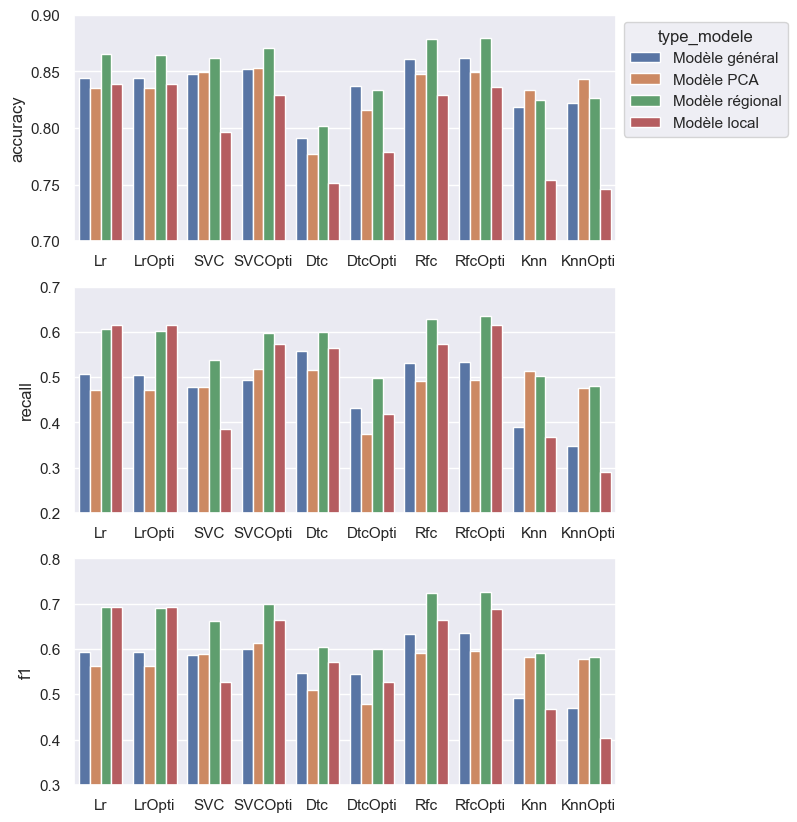

In [16]:
fig, axes = plt.subplots(3, 1)

sns.set(rc={"figure.figsize":(7, 10)})
aa=sns.barplot(data=df_print, x="nom_rac", y="accuracy", hue="type_modele", ax=axes[0])
sns.move_legend(aa, "upper left", bbox_to_anchor=(1, 1))
#aa.legend_.remove()
aa.set_xlabel("",fontsize=10)
#aa.set_xticklabels(["Modèle général","Modèle PCA","Modèle régional","Modèle local"],fontsize=10)
aa.set_ylim([0.7,0.9])


ab=sns.barplot(data=df_print, x="nom_rac", y="recall", hue="type_modele", ax=axes[1])
#sns.move_legend(ab, "upper left", bbox_to_anchor=(1, 1))
ab.legend_.remove()
ab.set_xlabel("",fontsize=10)
#ab.set_xticklabels(["Modèle général","Modèle PCA","Modèle régional","Modèle local"],fontsize=10)
ab.set_ylim([0.2,0.7])

ac=sns.barplot(data=df_print, x="nom_rac", y="f1", hue="type_modele", ax=axes[2])
#sns.move_legend(ac, "upper left", bbox_to_anchor=(1, 1))
ac.legend_.remove()
ac.set_xlabel("",fontsize=10)
#ac.set_xticklabels(["Modèle général","Modèle PCA","Modèle régional","Modèle local"],fontsize=10)
ac.set_ylim([0.3,0.8])

plt.show()

# Dans la suite du notebook : Les recherches des modèles opimisés

# Gridsearch : LogisticRegression

In [26]:
for X_train1,y_train1,X_test1,y_test1 in zip([X_train,X_train_pca,X_train_region,X_train_local],[y_train,y_train_pca,y_train_region,y_train_local],[X_test,X_test_pca,X_test_region,X_test_local],[y_test,y_test_pca,y_test_region,y_test_local]):

    logistic_params  = {
        "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        "penalty" : ['none', 'l1', 'l2', 'elasticnet'],
        'C' : [100, 10, 1.0, 0.1, 0.01],
        "class_weight" :['balanced', None]
    }

    # apply gridsearch model 
    lr_grid = GridSearchCV(LogisticRegression(), logistic_params, scoring = 'accuracy',cv = 4)

    lr_grid.fit(X_train1, y_train1)
    lr_grid.best_estimator_
    y_pred = lr_grid.predict(X_test1)

    best_score = lr_grid.best_score_
    best_params = lr_grid.best_params_
    precision = precision_score(y_test1, y_pred)
    roc = roc_auc_score(y_test1, y_pred)
    recall = recall_score(y_test1, y_pred)
    cm = confusion_matrix(y_test1, y_pred)


    print(f'Accuracy =: {round(lr_grid.score(X_train1, y_train1) * 100, 2)}%')

    print(f'Accuracy =: {round(lr_grid.score(X_test1, y_test1) * 100, 2)}%')

    print ('--')
    print ('Best Parameters is', best_params)
    print ('--')
    print ('ROC Score is', roc)
    print ('--')
    print ('Recall Score is ', recall)
    print ('--')
    print ('Confusion Matrix\n\n', cm)

Accuracy =: 84.87%
Accuracy =: 84.39%
--
Best Parameters is {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
--
ROC Score is 0.7234154776582298
--
Recall Score is  0.5042685292976329
--
Confusion Matrix

 [[16722  1019]
 [ 2555  2599]]
Accuracy =: 84.0%
Accuracy =: 83.56%
--
Best Parameters is {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
--
ROC Score is 0.7061250970803824
--
Recall Score is  0.4707023670935196
--
Confusion Matrix

 [[16704  1037]
 [ 2728  2426]]
Accuracy =: 86.47%
Accuracy =: 86.41%
--
Best Parameters is {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
--
ROC Score is 0.7769983726483247
--
Recall Score is  0.6019047619047619
--
Confusion Matrix

 [[2981  150]
 [ 418  632]]
Accuracy =: 83.66%
Accuracy =: 83.92%
--
Best Parameters is {'C': 1.0, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
--
ROC Score is 0.773884478510813
--
Recall Score is  0.6153846153846154
--
Confusion Matrix

 [[

# Gridsearch : DecisionTreeClassifier

In [14]:


for X_train1,y_train1,X_test1,y_test1 in zip([X_train,X_train_pca,X_train_region,X_train_local],[y_train,y_train_pca,y_train_region,y_train_local],[X_test,X_test_pca,X_test_region,X_test_local],[y_test,y_test_pca,y_test_region,y_test_local]):

    tree_params  = {
    "criterion" : ['gini', 'entropy', 'log_loss'],
    "max_depth" : [40,100, None],
    'splitter' : ['best', 'random'],
    'max_features' : ["auto",'sqrt', 'log2',None],
    'random_state' : [4,5],
    'max_leaf_nodes' : [5,10,None],
    'class_weight': ['balanced',None]
    }

    # apply gridsearch model 
    tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, scoring = 'accuracy',cv = 4)

    tree_grid.fit(X_train1, y_train1)
    tree_grid.best_estimator_
    y_pred = tree_grid.predict(X_test1)

    best_score = tree_grid.best_score_
    best_params = tree_grid.best_params_
    precision = precision_score(y_test1, y_pred)
    roc = roc_auc_score(y_test1, y_pred)
    recall = recall_score(y_test1, y_pred)
    cm = confusion_matrix(y_test1, y_pred)


    print(f'Accuracy =: {round(tree_grid.score(X_train1, y_train1) * 100, 2)}%')

    print(f'Accuracy =: {round(tree_grid.score(X_test1, y_test1) * 100, 2)}%')

    print ('--')
    print ('Best Parameters is', best_params)
    print ('--')
    print ('ROC Score is', roc)
    print ('--')
    print ('Recall Score is ', recall)
    print ('--')
    print ('Confusion Matrix\n\n', cm)

Accuracy =: 84.18%
Accuracy =: 83.73%
--
Best Parameters is {'class_weight': None, 'criterion': 'gini', 'max_depth': 40, 'max_features': None, 'max_leaf_nodes': 10, 'random_state': 4, 'splitter': 'best'}
--
ROC Score is 0.6937901823979264
--
Recall Score is  0.4326736515327901
--
Confusion Matrix

 [[16941   800]
 [ 2924  2230]]
Accuracy =: 82.19%
Accuracy =: 81.61%
--
Best Parameters is {'class_weight': None, 'criterion': 'gini', 'max_depth': 40, 'max_features': None, 'max_leaf_nodes': 10, 'random_state': 4, 'splitter': 'best'}
--
ROC Score is 0.6593068215166984
--
Recall Score is  0.37407838571982927
--
Confusion Matrix

 [[16757   984]
 [ 3226  1928]]
Accuracy =: 83.94%
Accuracy =: 83.35%
--
Best Parameters is {'class_weight': None, 'criterion': 'gini', 'max_depth': 40, 'max_features': None, 'max_leaf_nodes': 10, 'random_state': 4, 'splitter': 'best'}
--
ROC Score is 0.7223759334458791
--
Recall Score is  0.4990476190476191
--
Confusion Matrix

 [[2961  170]
 [ 526  524]]
Accuracy =

# Gridsearch : SVC

In [39]:
for X_train1,y_train1,X_test1,y_test1 in zip([X_train,X_train_pca,X_train_region,X_train_local],[y_train,y_train_pca,y_train_region,y_train_local],[X_test,X_test_pca,X_test_region,X_test_local],[y_test,y_test_pca,y_test_region,y_test_local]):

    SVM_params  = {
    #"kernel" : ['rbf'],# 'poly'],#, 'sigmoid'],
    #"degree" : [3,5],
    "C": [10.0, 1.0, 0.1],
    'class_weight': ['balanced',None]
    }

    # apply gridsearch model 
    svm_grid = GridSearchCV(SVC(), SVM_params, scoring = 'accuracy',cv = 4)

    svm_grid.fit(X_train1, y_train1)
    svm_grid.best_estimator_
    y_pred = svm_grid.predict(X_test1)

    best_score = svm_grid.best_score_
    best_params = svm_grid.best_params_
    precision = precision_score(y_test1, y_pred)
    roc = roc_auc_score(y_test1, y_pred)
    recall = recall_score(y_test1, y_pred)
    cm = confusion_matrix(y_test1, y_pred)


    print(f'Accuracy =: {round(svm_grid.score(X_train1, y_train1) * 100, 2)}%')

    print(f'Accuracy =: {round(svm_grid.score(X_test1, y_test1) * 100, 2)}%')

    print ('--')
    print ('Best Parameters is', best_params)
    print ('--')
    print ('ROC Score is', roc)
    print ('--')
    print ('Recall Score is ', recall)
    print ('--')
    print ('Confusion Matrix\n\n', cm)

Accuracy =: 85.9%
Accuracy =: 85.19%
--
Best Parameters is {'C': 10.0, 'class_weight': None}
--
ROC Score is 0.7250627573394322
--
Recall Score is  0.4943733022894839
--
Confusion Matrix

 [[16956   785]
 [ 2606  2548]]
Accuracy =: 88.07%
Accuracy =: 85.29%
--
Best Parameters is {'C': 10.0, 'class_weight': None}
--
ROC Score is 0.7337921174983716
--
Recall Score is  0.5170741171905316
--
Confusion Matrix

 [[16863   878]
 [ 2489  2665]]
Accuracy =: 87.43%
Accuracy =: 87.11%
--
Best Parameters is {'C': 10.0, 'class_weight': None}
--
ROC Score is 0.7800469954829585
--
Recall Score is  0.5971428571428572
--
Confusion Matrix

 [[3015  116]
 [ 423  627]]
Accuracy =: 85.42%
Accuracy =: 82.91%
--
Best Parameters is {'C': 10.0, 'class_weight': None}
--
ROC Score is 0.7542963165738966
--
Recall Score is  0.5726495726495726
--
Confusion Matrix

 [[263  18]
 [ 50  67]]


# Gridsearch : RandomForestClassifier

In [16]:
for X_train1,y_train1,X_test1,y_test1 in zip([X_train,X_train_pca,X_train_region,X_train_local],[y_train,y_train_pca,y_train_region,y_train_local],[X_test,X_test_pca,X_test_region,X_test_local],[y_test,y_test_pca,y_test_region,y_test_local]):

    rfc_params  = {
    'n_estimators': [500,1000,2000],
    'criterion' : ['gini', 'entropy'],
    "class_weight": ['balanced', 'balanced_subsample',None],
    #'max_features': ['auto'],
    #'random_state': [42]
    }

    # apply gridsearch model 
    rfc_grid = GridSearchCV(RandomForestClassifier(), rfc_params, scoring = 'accuracy',cv = 4)

    rfc_grid.fit(X_train1, y_train1)
    rfc_grid.best_estimator_
    y_pred = rfc_grid.predict(X_test1)

    best_score = rfc_grid.best_score_
    best_params = rfc_grid.best_params_
    precision = precision_score(y_test1, y_pred)
    roc = roc_auc_score(y_test1, y_pred)
    recall = recall_score(y_test1, y_pred)
    cm = confusion_matrix(y_test1, y_pred)


    print(f'Accuracy =: {round(rfc_grid.score(X_train1, y_train1) * 100, 2)}%')

    print(f'Accuracy =: {round(rfc_grid.score(X_test1, y_test1) * 100, 2)}%')

    print ('--')
    print ('Best Parameters is', best_params)
    print ('--')
    print ('ROC Score is', roc)
    print ('--')
    print ('Recall Score is ', recall)
    print ('--')
    print ('Confusion Matrix\n\n', cm)

Accuracy =: 100.0%
Accuracy =: 86.14%
--
Best Parameters is {'class_weight': None, 'criterion': 'entropy', 'n_estimators': 500}
--
ROC Score is 0.7450412914388351
--
Recall Score is  0.53337213814513
--
Confusion Matrix

 [[16973   768]
 [ 2405  2749]]
Accuracy =: 100.0%
Accuracy =: 84.97%
--
Best Parameters is {'class_weight': None, 'criterion': 'entropy', 'n_estimators': 500}
--
ROC Score is 0.7240665644805893
--
Recall Score is  0.4955374466433838
--
Confusion Matrix

 [[16900   841]
 [ 2600  2554]]
Accuracy =: 100.0%
Accuracy =: 87.92%
--
Best Parameters is {'class_weight': None, 'criterion': 'gini', 'n_estimators': 2000}
--
ROC Score is 0.797186962935925
--
Recall Score is  0.6323809523809524
--
Confusion Matrix

 [[3012  119]
 [ 386  664]]
Accuracy =: 100.0%
Accuracy =: 82.91%
--
Best Parameters is {'class_weight': None, 'criterion': 'gini', 'n_estimators': 1000}
--
ROC Score is 0.7642728959454939
--
Recall Score is  0.6068376068376068
--
Confusion Matrix

 [[259  22]
 [ 46  71]]

# Gridsearch : KNeighborsClassifier

In [36]:
for X_train1,y_train1,X_test1,y_test1 in zip([X_train,X_train_pca,X_train_region,X_train_local],[y_train,y_train_pca,y_train_region,y_train_local],[X_test,X_test_pca,X_test_region,X_test_local],[y_test,y_test_pca,y_test_region,y_test_local]):

    kneig_params  = {
    "n_neighbors" : [5,10,15,20],
    "weights" : ['uniform', 'distance'],
    #'metric' : ['euclidean', 'minkowski']
    }

    # apply gridsearch model 
    kn_grid = GridSearchCV(KNeighborsClassifier(), kneig_params, scoring = 'accuracy',cv = 4)

    kn_grid.fit(X_train1, y_train1)
    kn_grid.best_estimator_
    y_pred = kn_grid.predict(X_test1)

    best_score = kn_grid.best_score_
    best_params = kn_grid.best_params_
    precision = precision_score(y_test1, y_pred)
    roc = roc_auc_score(y_test1, y_pred)
    recall = recall_score(y_test1, y_pred)
    cm = confusion_matrix(y_test1, y_pred)


    print(f'Accuracy =: {round(kn_grid.score(X_train1, y_train1) * 100, 2)}%')

    print(f'Accuracy =: {round(kn_grid.score(X_test1, y_test1) * 100, 2)}%')

    print ('--')
    print ('Best Parameters is', best_params)
    print ('--')
    print ('ROC Score is', roc)
    print ('--')
    print ('Recall Score is ', recall)
    print ('--')
    print ('Confusion Matrix\n\n', cm)

Accuracy =: 100.0%
Accuracy =: 82.25%
--
Best Parameters is {'n_neighbors': 10, 'weights': 'distance'}
--
ROC Score is 0.6543768376154129
--
Recall Score is  0.34866123399301513
--
Confusion Matrix

 [[17033   708]
 [ 3357  1797]]
Accuracy =: 100.0%
Accuracy =: 84.35%
--
Best Parameters is {'n_neighbors': 20, 'weights': 'distance'}
--
ROC Score is 0.7135539896851951
--
Recall Score is  0.477105161039969
--
Confusion Matrix

 [[16854   887]
 [ 2695  2459]]
Accuracy =: 100.0%
Accuracy =: 82.68%
--
Best Parameters is {'n_neighbors': 10, 'weights': 'distance'}
--
ROC Score is 0.7118910739000167
--
Recall Score is  0.48095238095238096
--
Confusion Matrix

 [[2952  179]
 [ 545  505]]
Accuracy =: 100.0%
Accuracy =: 74.62%
--
Best Parameters is {'n_neighbors': 10, 'weights': 'distance'}
--
ROC Score is 0.6132706755482557
--
Recall Score is  0.2905982905982906
--
Confusion Matrix

 [[263  18]
 [ 83  34]]


# Warning : le reste du notebook est en vrac

# Test

In [35]:
param_grid = { 
    'n_estimators': [1000,2000,5000],
    'max_samples': [0.6,0.9,0.99],
    'criterion' :['entropy'],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'max_features': ['auto'],
    'max_depth' : [None],
    'bootstrap': [True]
}

#param_grid = { 
#    'n_estimators': [100,200,300,500,1000],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'max_depth' : [None,5,10,20,30],
#    'criterion' :['gini', 'entropy'],
#    'bootstrap': [True, False],
#    'min_samples_leaf': [1, 2, 4],
#    'min_samples_split': [2, 5, 10]
#}

rfc=RandomForestClassifier(random_state=42)

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, y_train)

CV_rfc_predictions = CV_rfc.predict(X_test)

# check accuracy
print("Accuracy: " + str(metrics.accuracy_score(y_test, CV_rfc_predictions)*100) +"%")

Accuracy: 86.12526570188976%


In [36]:
CV_rfc.best_params_

#Accuracy: 86.31
#{'bootstrap': False,
# 'criterion': 'entropy',
# 'max_depth': None,
# 'max_features': 'auto',
# 'n_estimators': 2000,
# 'min_samples_leaf': 1,
# 'min_samples_split': 2}


{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_samples': 0.99,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 5000}

# Affichage sympa de la matrice de confusion

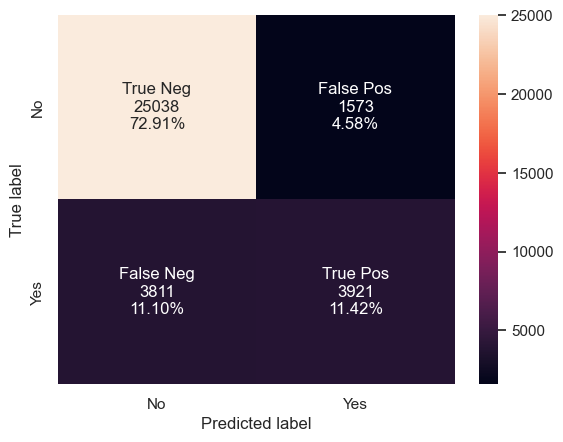

In [50]:
cm = confusion_matrix(y_test,y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

categories = ['No','Yes']


sns.heatmap(cm, annot=labels, fmt='',xticklabels=categories,yticklabels=categories)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Affichage de l'ensemble des parametres d'un modele

In [59]:
from pprint import pprint
pprint(forest1.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': 0.9,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [53]:
#from imblearn.metrics import classification_report_imbalanced
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     26611
           1       0.71      0.51      0.59      7732

    accuracy                           0.84     34343
   macro avg       0.79      0.72      0.75     34343
weighted avg       0.83      0.84      0.83     34343



# Essai avec Rééchentillonage

In [63]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids
from imblearn.metrics import classification_report_imbalanced

rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train, y_train)
print('Classes échantillon oversampled :', dict(pd.Series(y_ro).value_counts()))

#Random Undersampling
rUs = RandomUnderSampler()
X_ru, y_ru = rUs.fit_resample(X_train, y_train)
print('Classes échantillon undersampled :', dict(pd.Series(y_ru).value_counts()))

#SMOTE
#smo = SMOTE()
#X_sm, y_sm = smo.fit_resample(X_train, y_train)
#print('Classes échantillon SMOTE :', dict(pd.Series(y_sm).value_counts()))

Classes échantillon oversampled : {0: 62259, 1: 62259}
Classes échantillon undersampled : {0: 17872, 1: 17872}


In [62]:
svm = SVC(gamma='scale')
svm.fit(X_ro, y_ro)

y_pred = svm.predict(X_test)
print(pd.crosstab(y_test, y_pred))

print(classification_report_imbalanced(y_test, y_pred))

col_0             0     1
raintomorrow             
0             21383  5228
1              1810  5922


NameError: name 'classification_report_imbalanced' is not defined

In [66]:
svm = SVC(gamma='scale')
svm.fit(X_ru, y_ru)

y_pred = svm.predict(X_test)
print(pd.crosstab(y_test, y_pred))
print(classification_report_imbalanced(y_test, y_pred))

col_0             0     1
raintomorrow             
0             21287  5324
1              1868  5864
                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.80      0.76      0.86      0.78      0.61     26611
          1       0.52      0.76      0.80      0.62      0.78      0.60      7732

avg / total       0.83      0.79      0.77      0.80      0.78      0.61     34343



In [67]:
svm = SVC(gamma='scale', class_weight='balanced')
svm.fit(X_train, y_train)                         

preds = svm.predict(X_test)

pd.crosstab(y_test, preds)

col_0,0,1
raintomorrow,,
0,21377,5234
1,1837,5895


In [68]:
svm = SVC(probability=True, gamma='scale') # 'probability= True' est nécessaire pour retourner les probas
svm.fit(X_train, y_train)                        # mais ralentit l'entraînement

threshold = 0.4 # Tester avec 0.4, 0.6, ...

probs = svm.predict_proba(X_test)
pred_class = (probs[:,1]>=threshold).astype('int')

pd.crosstab(y_test, pred_class)

col_0,0,1
raintomorrow,,
0,24261,2350
1,3192,4540


# Essai sur la valeur de seuil de la classe 1

In [73]:
threshold = 0.3 # Tester avec 0.4, 0.6, ...

probs = svm.predict_proba(X_test)
pred_class = (probs[:,1]>=threshold).astype('int')

pd.crosstab(y_test, pred_class)

print(classification_report_imbalanced(y_test, pred_class))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.86      0.68      0.88      0.77      0.60     26611
          1       0.59      0.68      0.86      0.63      0.77      0.58      7732

avg / total       0.83      0.82      0.72      0.83      0.77      0.60     34343



In [74]:
pd.crosstab(y_test, pred_class)

col_0,0,1
raintomorrow,,
0,22937,3674
1,2439,5293


In [65]:
from imblearn.ensemble import BalancedRandomForestClassifier

bclf = BalancedRandomForestClassifier()
bclf.fit(X_train, y_train) 
y_pred = bclf.predict(X_test)
pd.crosstab(y_test, y_pred)

col_0,0,1
raintomorrow,,
0,21470,5141
1,1465,6267


# XGBOOST

In [86]:
import xgboost as xgb

train = xgb.DMatrix(data=X_train, label=y_train)
test = xgb.DMatrix(data=X_test, label=y_test)


In [88]:
params = {'booster': 'gbtree', 'learning_rate': 0.1, 'objective': 'binary:logistic','early_stopping_rounds': 20}

xgb = xgb.train(params=params, dtrain=train, num_boost_round=10000, evals=[(train, 'train'), (test, 'eval')])


[21:37:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "early_stopping_rounds" } are not used.

[0]	train-logloss:0.64038	eval-logloss:0.64141
[1]	train-logloss:0.59705	eval-logloss:0.59900
[2]	train-logloss:0.56081	eval-logloss:0.56370
[3]	train-logloss:0.53025	eval-logloss:0.53400
[4]	train-logloss:0.50439	eval-logloss:0.50910
[5]	train-logloss:0.48232	eval-logloss:0.48772
[6]	train-logloss:0.46319	eval-logloss:0.46918
[7]	train-logloss:0.44661	eval-logloss:0.45325
[8]	train-logloss:0.43228	eval-logloss:0.43952
[9]	train-logloss:0.41961	eval-logloss:0.42741
[10]	train-logloss:0.40863	eval-logloss:0.41699
[11]	train-logloss:0.39897	eval-logloss:0.40774
[12]	train-logloss:0.39041	eval-logloss:0.39975
[13]	train-logloss:0.38283	eval-logloss:0.39266
[14]	train-logloss:0.37612	eval-logloss:0.38647
[15]	train-logloss:0.37017	eval-logloss:0.38105
[16]	train-logloss:0.36468	eval

[333]	train-logloss:0.22913	eval-logloss:0.31333
[334]	train-logloss:0.22880	eval-logloss:0.31330
[335]	train-logloss:0.22878	eval-logloss:0.31330
[336]	train-logloss:0.22863	eval-logloss:0.31332
[337]	train-logloss:0.22855	eval-logloss:0.31331
[338]	train-logloss:0.22841	eval-logloss:0.31328
[339]	train-logloss:0.22815	eval-logloss:0.31322
[340]	train-logloss:0.22805	eval-logloss:0.31323
[341]	train-logloss:0.22776	eval-logloss:0.31319
[342]	train-logloss:0.22747	eval-logloss:0.31318
[343]	train-logloss:0.22738	eval-logloss:0.31317
[344]	train-logloss:0.22728	eval-logloss:0.31316
[345]	train-logloss:0.22709	eval-logloss:0.31316
[346]	train-logloss:0.22690	eval-logloss:0.31314
[347]	train-logloss:0.22667	eval-logloss:0.31309
[348]	train-logloss:0.22650	eval-logloss:0.31308
[349]	train-logloss:0.22621	eval-logloss:0.31310
[350]	train-logloss:0.22603	eval-logloss:0.31312
[351]	train-logloss:0.22588	eval-logloss:0.31311
[352]	train-logloss:0.22564	eval-logloss:0.31308
[353]	train-logloss:

[501]	train-logloss:0.19998	eval-logloss:0.31277
[502]	train-logloss:0.19967	eval-logloss:0.31269
[503]	train-logloss:0.19950	eval-logloss:0.31267
[504]	train-logloss:0.19937	eval-logloss:0.31270
[505]	train-logloss:0.19917	eval-logloss:0.31272
[506]	train-logloss:0.19892	eval-logloss:0.31274
[507]	train-logloss:0.19888	eval-logloss:0.31273
[508]	train-logloss:0.19862	eval-logloss:0.31270
[509]	train-logloss:0.19840	eval-logloss:0.31265
[510]	train-logloss:0.19826	eval-logloss:0.31265
[511]	train-logloss:0.19804	eval-logloss:0.31262
[512]	train-logloss:0.19778	eval-logloss:0.31265
[513]	train-logloss:0.19758	eval-logloss:0.31266
[514]	train-logloss:0.19747	eval-logloss:0.31265
[515]	train-logloss:0.19727	eval-logloss:0.31269
[516]	train-logloss:0.19707	eval-logloss:0.31270
[517]	train-logloss:0.19698	eval-logloss:0.31272
[518]	train-logloss:0.19690	eval-logloss:0.31272
[519]	train-logloss:0.19684	eval-logloss:0.31273
[520]	train-logloss:0.19670	eval-logloss:0.31268
[521]	train-logloss:

[669]	train-logloss:0.17599	eval-logloss:0.31351
[670]	train-logloss:0.17587	eval-logloss:0.31350
[671]	train-logloss:0.17566	eval-logloss:0.31352
[672]	train-logloss:0.17559	eval-logloss:0.31357
[673]	train-logloss:0.17555	eval-logloss:0.31360
[674]	train-logloss:0.17547	eval-logloss:0.31360
[675]	train-logloss:0.17532	eval-logloss:0.31362
[676]	train-logloss:0.17523	eval-logloss:0.31362
[677]	train-logloss:0.17516	eval-logloss:0.31366
[678]	train-logloss:0.17508	eval-logloss:0.31367
[679]	train-logloss:0.17497	eval-logloss:0.31369
[680]	train-logloss:0.17479	eval-logloss:0.31369
[681]	train-logloss:0.17472	eval-logloss:0.31370
[682]	train-logloss:0.17464	eval-logloss:0.31368
[683]	train-logloss:0.17462	eval-logloss:0.31368
[684]	train-logloss:0.17460	eval-logloss:0.31371
[685]	train-logloss:0.17459	eval-logloss:0.31370
[686]	train-logloss:0.17445	eval-logloss:0.31371
[687]	train-logloss:0.17426	eval-logloss:0.31375
[688]	train-logloss:0.17409	eval-logloss:0.31375
[689]	train-logloss:

[837]	train-logloss:0.15686	eval-logloss:0.31450
[838]	train-logloss:0.15673	eval-logloss:0.31448
[839]	train-logloss:0.15655	eval-logloss:0.31448
[840]	train-logloss:0.15643	eval-logloss:0.31448
[841]	train-logloss:0.15642	eval-logloss:0.31449
[842]	train-logloss:0.15629	eval-logloss:0.31452
[843]	train-logloss:0.15614	eval-logloss:0.31454
[844]	train-logloss:0.15614	eval-logloss:0.31454
[845]	train-logloss:0.15603	eval-logloss:0.31454
[846]	train-logloss:0.15592	eval-logloss:0.31453
[847]	train-logloss:0.15579	eval-logloss:0.31451
[848]	train-logloss:0.15560	eval-logloss:0.31455
[849]	train-logloss:0.15548	eval-logloss:0.31455
[850]	train-logloss:0.15526	eval-logloss:0.31453
[851]	train-logloss:0.15518	eval-logloss:0.31453
[852]	train-logloss:0.15504	eval-logloss:0.31457
[853]	train-logloss:0.15487	eval-logloss:0.31459
[854]	train-logloss:0.15473	eval-logloss:0.31460
[855]	train-logloss:0.15463	eval-logloss:0.31459
[856]	train-logloss:0.15445	eval-logloss:0.31457
[857]	train-logloss:

[1005]	train-logloss:0.13979	eval-logloss:0.31594
[1006]	train-logloss:0.13966	eval-logloss:0.31599
[1007]	train-logloss:0.13956	eval-logloss:0.31600
[1008]	train-logloss:0.13940	eval-logloss:0.31601
[1009]	train-logloss:0.13927	eval-logloss:0.31600
[1010]	train-logloss:0.13923	eval-logloss:0.31602
[1011]	train-logloss:0.13910	eval-logloss:0.31608
[1012]	train-logloss:0.13902	eval-logloss:0.31611
[1013]	train-logloss:0.13897	eval-logloss:0.31613
[1014]	train-logloss:0.13888	eval-logloss:0.31614
[1015]	train-logloss:0.13871	eval-logloss:0.31616
[1016]	train-logloss:0.13860	eval-logloss:0.31617
[1017]	train-logloss:0.13857	eval-logloss:0.31615
[1018]	train-logloss:0.13848	eval-logloss:0.31613
[1019]	train-logloss:0.13839	eval-logloss:0.31613
[1020]	train-logloss:0.13824	eval-logloss:0.31618
[1021]	train-logloss:0.13814	eval-logloss:0.31619
[1022]	train-logloss:0.13797	eval-logloss:0.31616
[1023]	train-logloss:0.13785	eval-logloss:0.31617
[1024]	train-logloss:0.13773	eval-logloss:0.31619


[1169]	train-logloss:0.12692	eval-logloss:0.31783
[1170]	train-logloss:0.12687	eval-logloss:0.31783
[1171]	train-logloss:0.12677	eval-logloss:0.31786
[1172]	train-logloss:0.12663	eval-logloss:0.31782
[1173]	train-logloss:0.12648	eval-logloss:0.31788
[1174]	train-logloss:0.12639	eval-logloss:0.31786
[1175]	train-logloss:0.12626	eval-logloss:0.31788
[1176]	train-logloss:0.12619	eval-logloss:0.31790
[1177]	train-logloss:0.12611	eval-logloss:0.31793
[1178]	train-logloss:0.12603	eval-logloss:0.31792
[1179]	train-logloss:0.12594	eval-logloss:0.31791
[1180]	train-logloss:0.12579	eval-logloss:0.31795
[1181]	train-logloss:0.12566	eval-logloss:0.31794
[1182]	train-logloss:0.12562	eval-logloss:0.31796
[1183]	train-logloss:0.12550	eval-logloss:0.31798
[1184]	train-logloss:0.12537	eval-logloss:0.31806
[1185]	train-logloss:0.12528	eval-logloss:0.31809
[1186]	train-logloss:0.12518	eval-logloss:0.31815
[1187]	train-logloss:0.12507	eval-logloss:0.31816
[1188]	train-logloss:0.12495	eval-logloss:0.31820


[1496]	train-logloss:0.10032	eval-logloss:0.32274
[1497]	train-logloss:0.10022	eval-logloss:0.32281
[1498]	train-logloss:0.10010	eval-logloss:0.32285
[1499]	train-logloss:0.09998	eval-logloss:0.32287
[1500]	train-logloss:0.09991	eval-logloss:0.32289
[1501]	train-logloss:0.09986	eval-logloss:0.32290
[1502]	train-logloss:0.09984	eval-logloss:0.32291
[1503]	train-logloss:0.09979	eval-logloss:0.32295
[1504]	train-logloss:0.09970	eval-logloss:0.32298
[1505]	train-logloss:0.09965	eval-logloss:0.32303
[1506]	train-logloss:0.09956	eval-logloss:0.32309
[1507]	train-logloss:0.09944	eval-logloss:0.32313
[1508]	train-logloss:0.09932	eval-logloss:0.32316
[1509]	train-logloss:0.09922	eval-logloss:0.32316
[1510]	train-logloss:0.09915	eval-logloss:0.32316
[1511]	train-logloss:0.09910	eval-logloss:0.32319
[1512]	train-logloss:0.09902	eval-logloss:0.32321
[1513]	train-logloss:0.09891	eval-logloss:0.32323
[1514]	train-logloss:0.09887	eval-logloss:0.32326
[1515]	train-logloss:0.09878	eval-logloss:0.32329


[1660]	train-logloss:0.08975	eval-logloss:0.32564
[1661]	train-logloss:0.08970	eval-logloss:0.32564
[1662]	train-logloss:0.08962	eval-logloss:0.32568
[1663]	train-logloss:0.08954	eval-logloss:0.32571
[1664]	train-logloss:0.08952	eval-logloss:0.32574
[1665]	train-logloss:0.08946	eval-logloss:0.32578
[1666]	train-logloss:0.08938	eval-logloss:0.32579
[1667]	train-logloss:0.08935	eval-logloss:0.32581
[1668]	train-logloss:0.08929	eval-logloss:0.32582
[1669]	train-logloss:0.08919	eval-logloss:0.32586
[1670]	train-logloss:0.08917	eval-logloss:0.32586
[1671]	train-logloss:0.08910	eval-logloss:0.32589
[1672]	train-logloss:0.08908	eval-logloss:0.32592
[1673]	train-logloss:0.08907	eval-logloss:0.32593
[1674]	train-logloss:0.08901	eval-logloss:0.32593
[1675]	train-logloss:0.08891	eval-logloss:0.32594
[1676]	train-logloss:0.08884	eval-logloss:0.32596
[1677]	train-logloss:0.08878	eval-logloss:0.32602
[1678]	train-logloss:0.08872	eval-logloss:0.32604
[1679]	train-logloss:0.08867	eval-logloss:0.32610


[1986]	train-logloss:0.07165	eval-logloss:0.33158
[1987]	train-logloss:0.07164	eval-logloss:0.33160
[1988]	train-logloss:0.07159	eval-logloss:0.33163
[1989]	train-logloss:0.07158	eval-logloss:0.33166
[1990]	train-logloss:0.07158	eval-logloss:0.33166
[1991]	train-logloss:0.07150	eval-logloss:0.33168
[1992]	train-logloss:0.07143	eval-logloss:0.33170
[1993]	train-logloss:0.07139	eval-logloss:0.33173
[1994]	train-logloss:0.07132	eval-logloss:0.33175
[1995]	train-logloss:0.07130	eval-logloss:0.33177
[1996]	train-logloss:0.07126	eval-logloss:0.33177
[1997]	train-logloss:0.07118	eval-logloss:0.33178
[1998]	train-logloss:0.07113	eval-logloss:0.33180
[1999]	train-logloss:0.07107	eval-logloss:0.33179
[2000]	train-logloss:0.07103	eval-logloss:0.33177
[2001]	train-logloss:0.07094	eval-logloss:0.33178
[2002]	train-logloss:0.07088	eval-logloss:0.33182
[2003]	train-logloss:0.07084	eval-logloss:0.33182
[2004]	train-logloss:0.07082	eval-logloss:0.33182
[2005]	train-logloss:0.07079	eval-logloss:0.33184


[2150]	train-logloss:0.06413	eval-logloss:0.33467
[2151]	train-logloss:0.06410	eval-logloss:0.33467
[2152]	train-logloss:0.06407	eval-logloss:0.33468
[2153]	train-logloss:0.06401	eval-logloss:0.33474
[2154]	train-logloss:0.06393	eval-logloss:0.33474
[2155]	train-logloss:0.06386	eval-logloss:0.33473
[2156]	train-logloss:0.06380	eval-logloss:0.33477
[2157]	train-logloss:0.06378	eval-logloss:0.33477
[2158]	train-logloss:0.06373	eval-logloss:0.33480
[2159]	train-logloss:0.06371	eval-logloss:0.33482
[2160]	train-logloss:0.06368	eval-logloss:0.33482
[2161]	train-logloss:0.06363	eval-logloss:0.33485
[2162]	train-logloss:0.06356	eval-logloss:0.33486
[2163]	train-logloss:0.06352	eval-logloss:0.33489
[2164]	train-logloss:0.06349	eval-logloss:0.33490
[2165]	train-logloss:0.06348	eval-logloss:0.33492
[2166]	train-logloss:0.06347	eval-logloss:0.33495
[2167]	train-logloss:0.06346	eval-logloss:0.33496
[2168]	train-logloss:0.06344	eval-logloss:0.33498
[2169]	train-logloss:0.06344	eval-logloss:0.33498


[2477]	train-logloss:0.05153	eval-logloss:0.34155
[2478]	train-logloss:0.05148	eval-logloss:0.34158
[2479]	train-logloss:0.05146	eval-logloss:0.34158
[2480]	train-logloss:0.05140	eval-logloss:0.34163
[2481]	train-logloss:0.05135	eval-logloss:0.34163
[2482]	train-logloss:0.05133	eval-logloss:0.34167
[2483]	train-logloss:0.05129	eval-logloss:0.34170
[2484]	train-logloss:0.05127	eval-logloss:0.34172
[2485]	train-logloss:0.05123	eval-logloss:0.34172
[2486]	train-logloss:0.05117	eval-logloss:0.34174
[2487]	train-logloss:0.05112	eval-logloss:0.34174
[2488]	train-logloss:0.05111	eval-logloss:0.34177
[2489]	train-logloss:0.05108	eval-logloss:0.34179
[2490]	train-logloss:0.05107	eval-logloss:0.34181
[2491]	train-logloss:0.05101	eval-logloss:0.34183
[2492]	train-logloss:0.05095	eval-logloss:0.34191
[2493]	train-logloss:0.05093	eval-logloss:0.34194
[2494]	train-logloss:0.05087	eval-logloss:0.34194
[2495]	train-logloss:0.05084	eval-logloss:0.34200
[2496]	train-logloss:0.05079	eval-logloss:0.34202


[2641]	train-logloss:0.04641	eval-logloss:0.34503
[2642]	train-logloss:0.04637	eval-logloss:0.34505
[2643]	train-logloss:0.04635	eval-logloss:0.34505
[2644]	train-logloss:0.04631	eval-logloss:0.34509
[2645]	train-logloss:0.04629	eval-logloss:0.34512
[2646]	train-logloss:0.04626	eval-logloss:0.34513
[2647]	train-logloss:0.04624	eval-logloss:0.34516
[2648]	train-logloss:0.04621	eval-logloss:0.34520
[2649]	train-logloss:0.04616	eval-logloss:0.34524
[2650]	train-logloss:0.04611	eval-logloss:0.34529
[2651]	train-logloss:0.04610	eval-logloss:0.34531
[2652]	train-logloss:0.04608	eval-logloss:0.34533
[2653]	train-logloss:0.04608	eval-logloss:0.34533
[2654]	train-logloss:0.04605	eval-logloss:0.34536
[2655]	train-logloss:0.04603	eval-logloss:0.34538
[2656]	train-logloss:0.04601	eval-logloss:0.34539
[2657]	train-logloss:0.04596	eval-logloss:0.34542
[2658]	train-logloss:0.04594	eval-logloss:0.34542
[2659]	train-logloss:0.04590	eval-logloss:0.34544
[2660]	train-logloss:0.04586	eval-logloss:0.34547


KeyboardInterrupt: 

In [92]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(objective='binary:logistic')
xgbc.fit(X_train,y_train)
predicted = xgbc.predict(X_test)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("F1 score for XGBoost is :",f1_score(y_test, predicted,)*100, "%")

The accuracy of Logistic Regression is :  85.99132283143581 %

F1 score for XGBoost is : 64.75716064757161 %


In [97]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken



def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()



Accuracy = 0.8674839122965379
ROC Area under Curve = 0.7728217658241558
Cohen's Kappa = 0.5895982500034811
Time taken = 74.51568269729614
              precision    recall  f1-score   support

           0    0.89064   0.94502   0.91702     26611
           1    0.76044   0.60062   0.67115      7732

    accuracy                        0.86748     34343
   macro avg    0.82554   0.77282   0.79409     34343
weighted avg    0.86132   0.86748   0.86167     34343



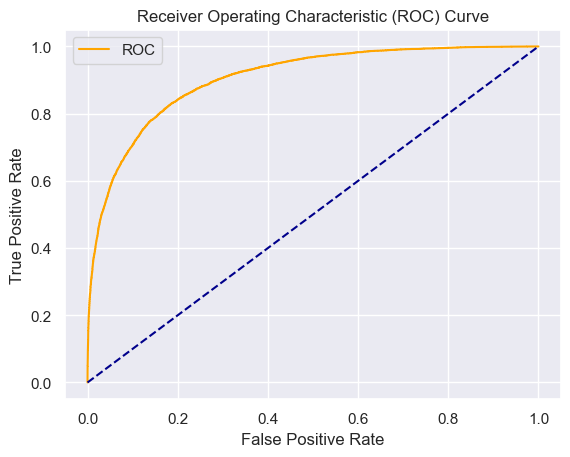

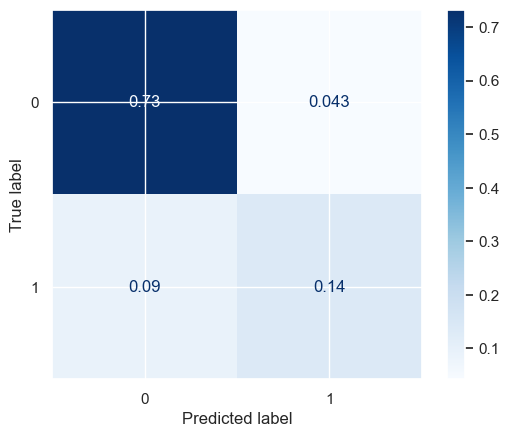

In [98]:
# XGBoost
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

In [99]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'max_depth': range(15, 20),
    'n_estimators':range(500, 1500,100)
}
clf = xgb.XGBClassifier(eta = 0.1)
randomized_clf = RandomizedSearchCV(estimator=clf,param_distributions=param_grid,scoring = 'accuracy',n_iter = 7, cv = 3, random_state = 42)
randomized_clf.fit(X_train,y_train)

print("Best parameters: ", randomized_clf.best_params_)
print("Best Score: ", randomized_clf.best_score_)
features = pd.DataFrame(randomized_clf.best_estimator_.feature_importances_,index = X_train.columns)
features.sort_values(by = 0, ascending = True, inplace = True)
plt.figure(figsize=(20,15))
features.plot(kind = 'barh')

y_pred = randomized_clf.best_estimator_.predict(X_test)
plot_confusion_matrix(randomized_clf.best_estimator_, X_test, y_test)
print(classification_report(y_test,y_pred))


#Best parameters:  {'n_estimators': 1400, 'max_depth': 18}
#Best Score:  0.8672673172800799

Best parameters:  {'n_estimators': 1400, 'max_depth': 18}
Best Score:  0.8672673172800799


NameError: name 'X' is not defined

Best parameters:  {'n_estimators': 1400, 'max_depth': 18}
Best Score:  0.8672673172800799
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26611
           1       0.77      0.60      0.67      7732

    accuracy                           0.87     34343
   macro avg       0.83      0.77      0.79     34343
weighted avg       0.86      0.87      0.86     34343



<Figure size 2000x1500 with 0 Axes>

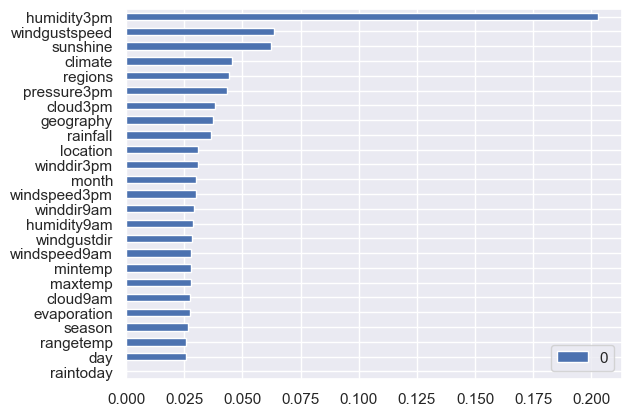

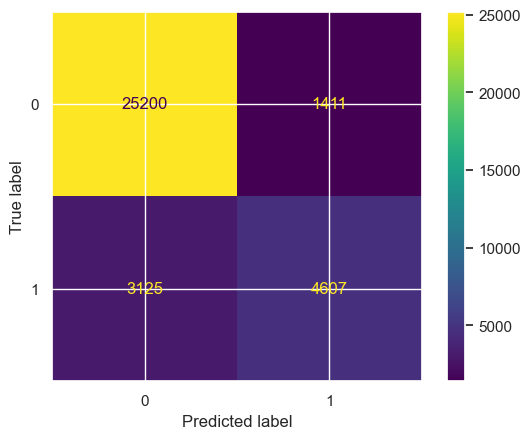

In [100]:
print("Best parameters: ", randomized_clf.best_params_)
print("Best Score: ", randomized_clf.best_score_)
features = pd.DataFrame(randomized_clf.best_estimator_.feature_importances_,index = X_train.columns)
features.sort_values(by = 0, ascending = True, inplace = True)
plt.figure(figsize=(20,15))
features.plot(kind = 'barh')

y_pred = randomized_clf.best_estimator_.predict(X_test)
plot_confusion_matrix(randomized_clf.best_estimator_, X_test, y_test)
print(classification_report(y_test,y_pred))




In [117]:
train = xgb.DMatrix(data=X_train, label=y_train)
test = xgb.DMatrix(data=X_test, label=y_test)

params = {'booster': 'gbtree', 'learning_rate': 0.1, 'objective': 'binary:logistic'}

xgb2 = xgb.train(params=params, dtrain=train, num_boost_round=700, evals=[(train, 'train'), (test, 'eval')])

#bst_cv = xgb.cv(params=params,
#                dtrain=train,
#                num_boost_round=100,
#                nfold=3,
#                early_stopping_rounds=60)
#bst_cv

preds = xgb2.predict(test)

xgbpreds = pd.Series(np.where(preds > 0.1, 1, 0))
pd.crosstab(xgbpreds, pd.Series(y_test))

#print(classification_report(y_test,xgbpreds))

[0]	train-logloss:0.64038	eval-logloss:0.64141
[1]	train-logloss:0.59705	eval-logloss:0.59900
[2]	train-logloss:0.56081	eval-logloss:0.56370
[3]	train-logloss:0.53025	eval-logloss:0.53400
[4]	train-logloss:0.50439	eval-logloss:0.50910
[5]	train-logloss:0.48232	eval-logloss:0.48772
[6]	train-logloss:0.46319	eval-logloss:0.46918
[7]	train-logloss:0.44661	eval-logloss:0.45325
[8]	train-logloss:0.43228	eval-logloss:0.43952
[9]	train-logloss:0.41961	eval-logloss:0.42741
[10]	train-logloss:0.40863	eval-logloss:0.41699
[11]	train-logloss:0.39897	eval-logloss:0.40774
[12]	train-logloss:0.39041	eval-logloss:0.39975
[13]	train-logloss:0.38283	eval-logloss:0.39266
[14]	train-logloss:0.37612	eval-logloss:0.38647
[15]	train-logloss:0.37017	eval-logloss:0.38105
[16]	train-logloss:0.36468	eval-logloss:0.37610
[17]	train-logloss:0.35985	eval-logloss:0.37157
[18]	train-logloss:0.35558	eval-logloss:0.36775
[19]	train-logloss:0.35167	eval-logloss:0.36424
[20]	train-logloss:0.34799	eval-logloss:0.36094
[2

[170]	train-logloss:0.26489	eval-logloss:0.31722
[171]	train-logloss:0.26456	eval-logloss:0.31716
[172]	train-logloss:0.26427	eval-logloss:0.31713
[173]	train-logloss:0.26416	eval-logloss:0.31709
[174]	train-logloss:0.26399	eval-logloss:0.31702
[175]	train-logloss:0.26355	eval-logloss:0.31691
[176]	train-logloss:0.26351	eval-logloss:0.31691
[177]	train-logloss:0.26307	eval-logloss:0.31676
[178]	train-logloss:0.26263	eval-logloss:0.31672
[179]	train-logloss:0.26236	eval-logloss:0.31665
[180]	train-logloss:0.26220	eval-logloss:0.31668
[181]	train-logloss:0.26217	eval-logloss:0.31668
[182]	train-logloss:0.26198	eval-logloss:0.31664
[183]	train-logloss:0.26168	eval-logloss:0.31661
[184]	train-logloss:0.26160	eval-logloss:0.31658
[185]	train-logloss:0.26116	eval-logloss:0.31639
[186]	train-logloss:0.26098	eval-logloss:0.31637
[187]	train-logloss:0.26064	eval-logloss:0.31626
[188]	train-logloss:0.26042	eval-logloss:0.31627
[189]	train-logloss:0.26030	eval-logloss:0.31626
[190]	train-logloss:

[338]	train-logloss:0.22841	eval-logloss:0.31328
[339]	train-logloss:0.22815	eval-logloss:0.31322
[340]	train-logloss:0.22805	eval-logloss:0.31323
[341]	train-logloss:0.22776	eval-logloss:0.31319
[342]	train-logloss:0.22747	eval-logloss:0.31318
[343]	train-logloss:0.22738	eval-logloss:0.31317
[344]	train-logloss:0.22728	eval-logloss:0.31316
[345]	train-logloss:0.22709	eval-logloss:0.31316
[346]	train-logloss:0.22690	eval-logloss:0.31314
[347]	train-logloss:0.22667	eval-logloss:0.31309
[348]	train-logloss:0.22650	eval-logloss:0.31308
[349]	train-logloss:0.22621	eval-logloss:0.31310
[350]	train-logloss:0.22603	eval-logloss:0.31312
[351]	train-logloss:0.22588	eval-logloss:0.31311
[352]	train-logloss:0.22564	eval-logloss:0.31308
[353]	train-logloss:0.22556	eval-logloss:0.31308
[354]	train-logloss:0.22553	eval-logloss:0.31308
[355]	train-logloss:0.22541	eval-logloss:0.31308
[356]	train-logloss:0.22523	eval-logloss:0.31306
[357]	train-logloss:0.22517	eval-logloss:0.31306
[358]	train-logloss:

[673]	train-logloss:0.17555	eval-logloss:0.31360
[674]	train-logloss:0.17547	eval-logloss:0.31360
[675]	train-logloss:0.17532	eval-logloss:0.31362
[676]	train-logloss:0.17523	eval-logloss:0.31362
[677]	train-logloss:0.17516	eval-logloss:0.31366
[678]	train-logloss:0.17508	eval-logloss:0.31367
[679]	train-logloss:0.17497	eval-logloss:0.31369
[680]	train-logloss:0.17479	eval-logloss:0.31369
[681]	train-logloss:0.17472	eval-logloss:0.31370
[682]	train-logloss:0.17464	eval-logloss:0.31368
[683]	train-logloss:0.17462	eval-logloss:0.31368
[684]	train-logloss:0.17460	eval-logloss:0.31371
[685]	train-logloss:0.17459	eval-logloss:0.31370
[686]	train-logloss:0.17445	eval-logloss:0.31371
[687]	train-logloss:0.17426	eval-logloss:0.31375
[688]	train-logloss:0.17409	eval-logloss:0.31375
[689]	train-logloss:0.17395	eval-logloss:0.31373
[690]	train-logloss:0.17377	eval-logloss:0.31371
[691]	train-logloss:0.17368	eval-logloss:0.31370
[692]	train-logloss:0.17358	eval-logloss:0.31375
[693]	train-logloss:

raintomorrow,0,1
row_0,,
0,3366,1020
1,2725,789


In [132]:
preds = xgb2.predict(test)

xgbpreds = pd.Series(np.where(preds > 0.3, 1, 0))
#pd.crosstab(xgbpreds,pd.Series(y_test) )

print(classification_report(y_test,xgbpreds))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     26611
           1       0.71      0.66      0.68      7732

    accuracy                           0.86     34343
   macro avg       0.81      0.79      0.80     34343
weighted avg       0.86      0.86      0.86     34343



# Réseau de neurones

In [ ]:
conda create -n tf tensorflow
conda activate tf

In [40]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,f1_score,accuracy_score

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')



ModuleNotFoundError: No module named 'tensorflow'